In [3]:
import scipy.io as sio
import skimage.registration
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
psfs_path = '/home/rshuai/research/u-net-reconstruction/data/PSFs/9_psfs/psfs_Z1_1_9.mat'

psfs = sio.loadmat(psfs_path)['psfs'].transpose(2, 1, 0)
assert psfs.shape == (9, 648, 486)

psfs = psfs / np.max(psfs)

num_psfs = psfs.shape[0]

central_psf = psfs[4]

## Calculate shift for each psf using central psf as a reference

In [10]:
shifts = []

for i in range(num_psfs):
    shift, error, diffphase = skimage.registration.phase_cross_correlation(central_psf, psfs[i])
    shifts.append(shift)

## Translate image by shift

In [14]:
registered_psfs = np.zeros_like(psfs)
_, h, w = psfs.shape

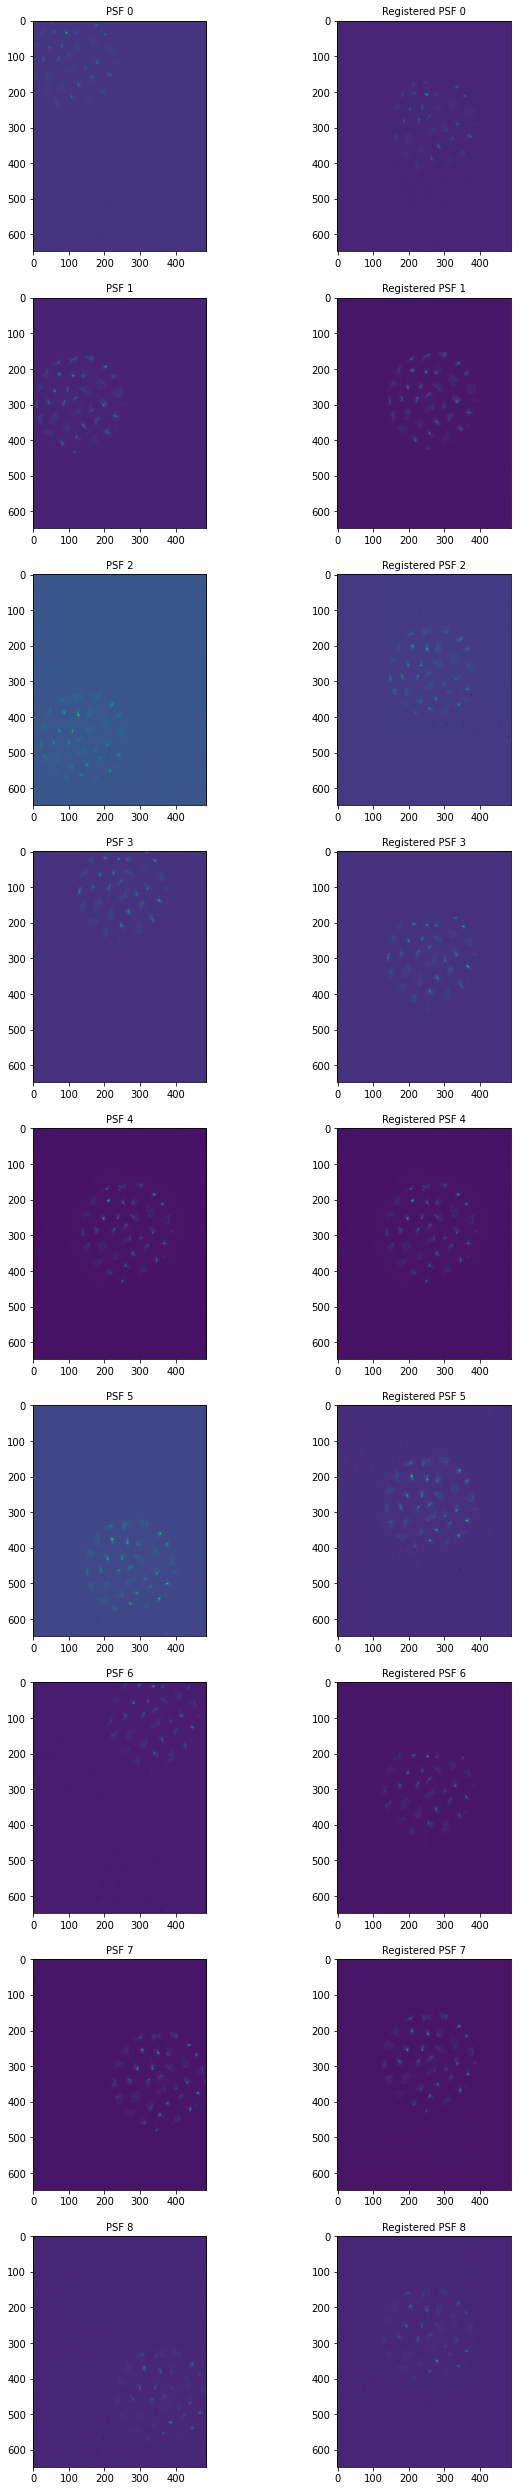

In [17]:
fig = plt.figure(figsize=(10, 5 * num_psfs))
rows, columns = num_psfs, 2

for i in range(num_psfs):
    # Build translation matrix
    shift = shifts[i]
    shift_x = shift[1]
    shift_y = shift[0]
    translation_matrix = np.array([[1, 0, shift_x],
                                    [0, 1, shift_y]])
    
    # Translate image with cv2
    registered_psfs[i] = cv2.warpAffine(psfs[i], translation_matrix, (w, h))
    
    s = fig.add_subplot(rows, columns, columns*i+1)
    s.set_title('PSF {}'.format(i), size=10)
    plt.imshow(psfs[i])
    
    s = fig.add_subplot(rows, columns, columns*i+2)
    s.set_title('Registered PSF {}'.format(i), size=10)
    plt.imshow(registered_psfs[i])
        
plt.show()

## Save registered_psfs

In [18]:
np.save('/home/rshuai/research/u-net-reconstruction/data/PSFs/9_psfs/psfs_Z1_1_9_registered.npy', registered_psfs)